# Udacity Project 5: Communicate Data Findings
Analyzing Ford GoBike System Data
## by Haotong Li
### 2019 June 19


## Preliminary Wrangling

>Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. 

>Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import zipfile
import datetime
import folium
from sklearn.cluster import KMeans
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
'''
# Create folder for storing data
folder_name_csvs = 'trip_data_files'
if not os.path.exists(folder_name_csvs):
    os.makedirs(folder_name_csvs)

# Specify date and year for desired data
year_month = [x for x in range(201806, 201813)] + [x for x in range(201901, 201906)] # latest data is for May 2019

# Loop over years and download data
for yr_mth in year_month:
    # url structure
    url = f"https://s3.amazonaws.com/baywheels-data/{yr_mth}-fordgobike-tripdata.csv.zip"
    response = requests.get(url)
    # Save file
    with open(f"{yr_mth}-fordgobike-tripdata.csv.zip", mode = "wb") as file:
        file.write(response.content)
    # Unzip downloaded files
    unzipped_file = ZipFile(BytesIO(response.content))
    unzipped_file.extractall(folder_name_of_csvs)
'''

'\n# Create folder for storing data\nfolder_name_csvs = \'trip_data_files\'\nif not os.path.exists(folder_name_csvs):\n    os.makedirs(folder_name_csvs)\n\n# Specify date and year for desired data\nyear_month = [x for x in range(201806, 201813)] + [x for x in range(201901, 201906)] # latest data is for May 2019\n\n# Loop over years and download data\nfor yr_mth in year_month:\n    # url structure\n    url = f"https://s3.amazonaws.com/baywheels-data/{yr_mth}-fordgobike-tripdata.csv.zip"\n    response = requests.get(url)\n    # Save file\n    with open(f"{yr_mth}-fordgobike-tripdata.csv.zip", mode = "wb") as file:\n        file.write(response.content)\n    # Unzip downloaded files\n    unzipped_file = ZipFile(BytesIO(response.content))\n    unzipped_file.extractall(folder_name_of_csvs)\n'

In [3]:
'''
folder_name_csvs = 'trip_data_files'
list_csvs = []
# Append saved CSVs in list
for file_name in os.listdir(folder_name_csvs):
    list_csvs.append(pd.read_csv(folder_name_csvs+'/'+file_name))
# Concat csvs
df = pd.concat(list_csvs, ignore_index=True)
'''

"\nfolder_name_csvs = 'trip_data_files'\nlist_csvs = []\n# Append saved CSVs in list\nfor file_name in os.listdir(folder_name_csvs):\n    list_csvs.append(pd.read_csv(folder_name_csvs+'/'+file_name))\n# Concat csvs\ndf = pd.concat(list_csvs, ignore_index=True)\n"

In [4]:
'''
# Save master df
df.to_csv('go_bike_data.csv', index=False)
'''

"\n# Save master df\ndf.to_csv('go_bike_data.csv', index=False)\n"

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('go_bike_data.csv')

### Structure of dataset

The original Bay Wheels's trip dataset contains 2114592 rides and 16 features. I added 7 more features for analysis purpose. 

01. **`duration_sec`**: Trip Duration (seconds)
02. **`start_time`**>: Start Time and Date
03. **`end_time`**: End Time and Date
04. **`start_station_id`**: Start Station ID
05. **`start_station_name`**: Start Station Name
06. **`start_station_latitude`**: Start Station Latitude
07. **`start_station_longitude`**: Start Station Longitude
08. **`end_station_id`**: End Station ID
09. **`end_station_name`**: End Station Name
10. **`end_station_latitude`**: End Station Latitude
11. **`end_station_longitude`**: End Station Longitude
12. **`bike_id`**: Bike ID
13. **`user_type`**: User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
14. **`member_birth_year`**: Member Year of Birth
15. **`member_gender`**: Member Gender
16. **`bike_share_for_all_trip`**: Boolean to track members who are enrolled in the "Bike Share for All" program for low-income residents
17. **`start_metro_area`** <u>[added feature]</u>: Starting station's metro area
18. **`end_metro_area`** <u>[added feature]</u>: Ending station's metro area
19. **`member_age`** <u>[added feature]</u>: Age of user
20. **`age_group`** <u>[added feature]</u>: Age group of user
21. **`month`** <u>[added feature]</u>: Month of ride
22. **`weekday`** <u>[added feature]</u>: Day of week of ride
23. **`hours`** <u>[added feature]</u>: Time of day of ride

### What is/are the main feature(s) of interest in your dataset?

01. **`location`**
02. **`Duration`**
03. **`Age`, `Gender`, `Membership Status`**
04. **`Month`, `Weekday`, `Hour`**
05. **`Route`** 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Columns should be added to assist analysis:
01. **`duration`**
02. **`metro_area`**
03. **`member_age`** 
04. **`age_group`**
05. **`month`**
06. **`weekday`**
07. **`hours`**

## Assessing Data

In [6]:
# Overview of data
print(df.shape)
print(df.info())
print(df.describe())

(2293592, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293592 entries, 0 to 2293591
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 280.0+ MB
None
       duration_sec  start_station_id  start_station_latitude  \
count  2.293592e+06      2.281076e+06            2.293592e+06   
mean   8.178626e+02      1.307847e+02            3.776833e+01   
std    2.105876e+03      1.087697e+02            1.070921e-0

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59088,2018-06-30 23:32:44.6590,2018-07-01 15:57:33.3160,76.0,McCoppin St at Valencia St,37.771662,-122.422423,95.0,Sanchez St at 15th St,37.766219,-122.431060,2100,Subscriber,1975.0,Male,Yes
1,60358,2018-06-30 21:48:19.5570,2018-07-01 14:34:18.1000,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,653,Customer,NaN,NaN,No
2,63654,2018-06-30 20:26:53.0310,2018-07-01 14:07:47.2320,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,50.0,2nd St at Townsend St,37.780526,-122.390288,3235,Subscriber,1962.0,Female,No
3,50508,2018-06-30 20:29:59.8130,2018-07-01 10:31:48.2500,58.0,Market St at 10th St,37.776619,-122.417385,88.0,11th St at Bryant St,37.770030,-122.411726,3675,Subscriber,1992.0,Male,No
4,51697,2018-06-30 18:24:56.6960,2018-07-01 08:46:33.7390,196.0,Grand Ave at Perkins St,37.808894,-122.256460,272.0,Woolsey St at Sacramento St,37.850578,-122.278175,3232,Customer,1989.0,Female,No


In [8]:
# Check for duplicated row
df[df.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [9]:
# Check for missing values for each column
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12516
start_station_name          12516
start_station_latitude          0
start_station_longitude         0
end_station_id              12516
end_station_name            12516
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          114001
member_gender              113829
bike_share_for_all_trip         0
dtype: int64

>**`start_station_id`**, **`start_station_name`**, **`end_station_id`** and **`end_station_name`** have 12516 nan. Also we can drop all the missing value in **`member_birth_year`** and **`member_gender`**.

## Accessing Summary
01. **`start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year`** and **`member_gender`** columns have missing values
    <br>1.1. **`start_metro_area`** and **`end_metro_area`** columns should be added to label strat and end stations
02. **`start_time`** and **`end_time`** should be data type datetime
03. **`weekday`** and **`hours`** column should be added for analysis
04. **`start_station_id`, `end_station_id`, `member_birth_year`** should be data type int
05. **`member_birth_year`** should be converted to member's age 
    <br>5.1. **`member_age`** outliers should be removed
    <br>5.2. **`age_group`** column added
06. **`bike_share_for_all_trip`** should be boolean
07. **`user_type`**, **`member_gender`**, **`month`**, **`weekday`** and **`hour`** should be categorical variables
08. **`duration_sec`** has many large values maybe outlier due to customers forgot to log off after using

## Cleaning Data

**Define 1** <br>
**`start_station_id`**, **`start_station_name`**, **`end_station_id`**, **`end_station_name`**, **`member_birth_year`** and **`member_gender`** columns have missing values

In [10]:
# Check coordinates for rows with missing start/end station names and id 
print(df[df.start_station_id.isnull()].start_station_latitude.value_counts())
print(df[df.start_station_id.isnull()].start_station_longitude.value_counts())

37.41    5158
37.40    4672
37.42    1263
37.39     870
37.38     416
37.34      37
37.43      23
37.37      17
37.35      17
37.33      17
37.36       9
45.51       4
40.66       3
37.44       3
37.32       2
44.95       2
45.50       2
37.45       1
Name: start_station_latitude, dtype: int64
-121.94    4270
-121.93    3009
-121.96    2085
-121.95    1660
-121.92    1288
-121.97      52
-121.91      41
-121.98      33
-121.90      25
-121.89      22
-121.88       8
-73.57        6
-121.87       4
-121.84       3
-74.01        3
-121.86       3
-93.22        2
-121.83       1
-121.99       1
Name: start_station_longitude, dtype: int64


> All those rows with missing values should be dropped. Most rows with missing start/end id and station name have similar coordinates. Also those rows have lower accuracy of coordinates with only 2 decimal points

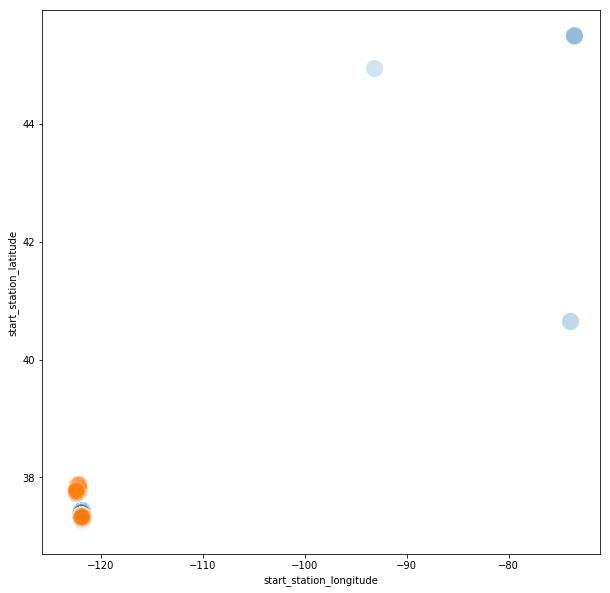

In [11]:
# Plotting missing start/end id and station name
plt.figure(figsize=(10,10))
sns.scatterplot(data = df[df.start_station_id.isnull()], 
                x = "start_station_longitude",
                y = "start_station_latitude",
                s = 300, alpha = 0.1)
sns.scatterplot(data = df.dropna(subset=["start_station_id"]).sample(100000),
                x = "start_station_longitude",
                y = "start_station_latitude",
                s = 300, alpha = 0.1);

> Only consider coordinates that are located in Bay Area. Outlier should be removed and not useful for the analysis.

**Code 1**

In [12]:
# Make copy of original df and drop rows with missing values
df_clean = df.dropna()

In [13]:
# Remove all the coordinates outside Bay Area
df_clean = df_clean.query('end_station_latitude > 37 and end_station_latitude < 38 and end_station_longitude > -123 and end_station_longitude < -121 and start_station_latitude > 37 and start_station_latitude < 38 and start_station_longitude > -123 and start_station_longitude < -121')

**Test 1**

In [14]:
# Check for missing values
df_clean.isna().sum().any()

False

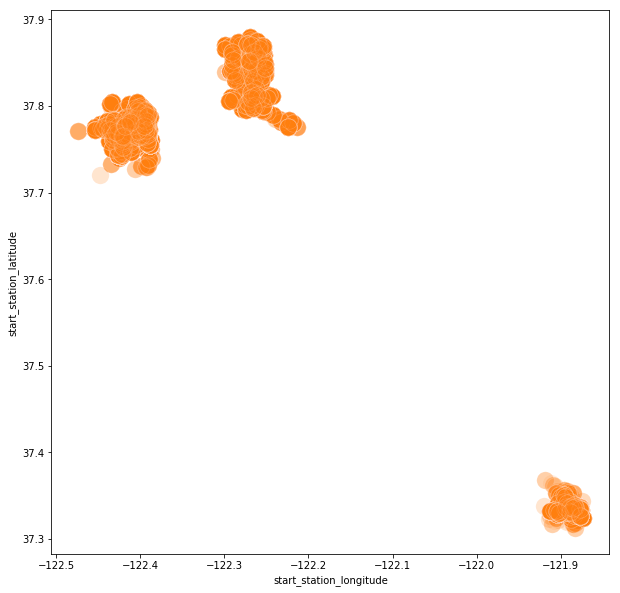

In [15]:
# Plotting no missing data df start/end id and station name 
plt.figure(figsize=(10,10))
sns.scatterplot(data = df_clean[df_clean.start_station_id.isnull()], 
                x = "start_station_longitude",
                y = "start_station_latitude",
                s = 300, alpha = 0.1)
sns.scatterplot(data = df_clean.dropna(subset=["start_station_id"]).sample(100000),
                x = "start_station_longitude",
                y = "start_station_latitude",
                s = 300, alpha = 0.1);

> Above graph shows the 3 main areas of GoBike: **SF**, **SJ** and **East Bay**.
<br>**`start_metro_area`** and **`start_metro_area`** columns should be added to label each station

**Define 1.1** <br>
**`start_metro_area`** and **`end_metro_area`** columns should be added to label strat and end stations

**Code 1.1**

In [16]:
# Using sklean module's K-Mean clustering algorithm to label each start/end stations
# Start staion
kmeans_start = KMeans(n_clusters=3, random_state=0).fit(df_clean[["start_station_latitude", "start_station_longitude"]])
df_clean['start_metro_area'] = kmeans_start.labels_
df_clean['start_metro_area'].replace({0:'East Bay', 1:'San Jose', 2:'San Francisco'}, inplace=True) # Hard coding the labels
                                                                                                    # set random_state = 0

In [17]:
# End station
kmeans_end = KMeans(n_clusters=3, random_state=0).fit(df_clean[["end_station_latitude", "end_station_longitude"]])
df_clean['end_metro_area'] = kmeans_end.labels_
df_clean['end_metro_area'].replace({0:'East Bay', 1:'San Francisco', 2:'San Jose'}, inplace=True)   # Hard coding the labels
                                                                                                    # set random_state = 0

**Test 1.1**

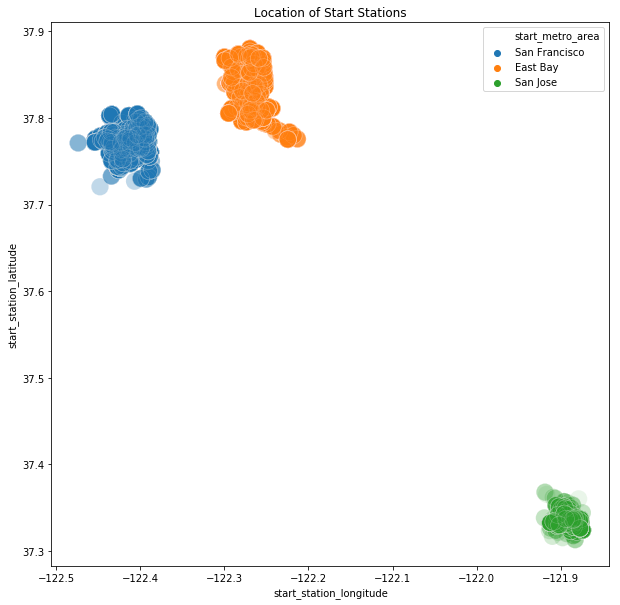

In [18]:
# Plotting start station coordinates
plt.figure(figsize=(10,10))
plt.title('Location of Start Stations')
sns.scatterplot(data = df_clean.sample(100000),
                x = "start_station_longitude",
                y = "start_station_latitude",
                hue = "start_metro_area",
                s=300, alpha = 0.1);

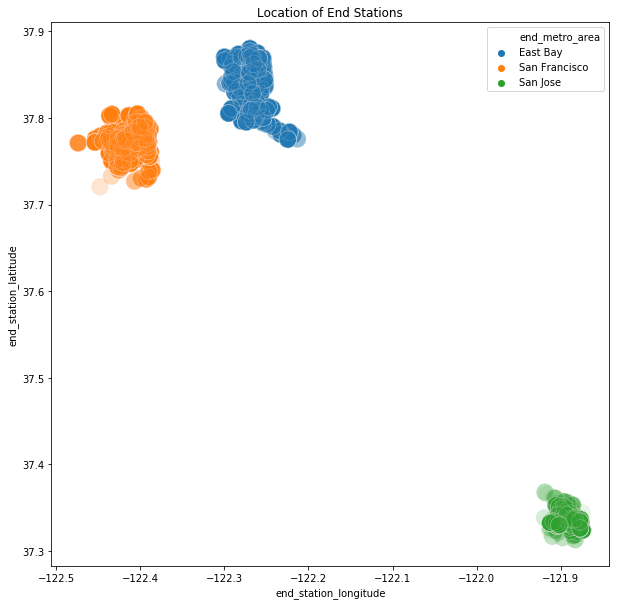

In [19]:
# Plotting end station coordinates
plt.figure(figsize=(10,10))
plt.title('Location of End Stations')
sns.scatterplot(data = df_clean.sample(100000),
                x = "end_station_longitude",
                y = "end_station_latitude",
                hue = "end_metro_area",
                s=300, alpha = 0.1);

**Define 2** <br>
**`start_time`** and **`end_time`** should be converted to datetime data type

**Code 2**

In [20]:
# Converted to datetime
df_clean['start_time']=pd.to_datetime(df_clean['start_time'])
df_clean['end_time']=pd.to_datetime(df_clean['end_time'])

**Test 2**

In [21]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
start_metro_area                   object
end_metro_area                     object
dtype: object

**Define 3** <br>
**`month`**, **`weekday`** and **`hours`** column should be added for analysis

**Code 3**

In [22]:
# Create month column
df_clean['month'] = df_clean['start_time'].dt.month

# Create month column
df_clean['weekday'] = df_clean['start_time'].dt.weekday_name.astype('category')

# Create month column
df_clean['hour'] = df_clean['start_time'].dt.hour

**Test 3**

In [23]:
df_clean[['month','weekday','hour']].sample(5)

,month,weekday,hour
167156,6,Tuesday,17
1275771,1,Monday,9
92495,6,Sunday,13
1554126,2,Monday,14
304721,7,Sunday,22


**Define 4** <br>
**`start_station_id`**, **`end_station_id`**, **`member_birth_year`** should be data type int

**Code 4**

In [24]:
df_clean['start_station_id']=df_clean['start_station_id'].astype('int')
df_clean['end_station_id']=df_clean['end_station_id'].astype('int')
df_clean['member_birth_year']=df_clean['member_birth_year'].astype('int')

**Test 4**

In [25]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
start_metro_area                   object
end_metro_area                     object
month                               int64
weekday                          category
hour                                int64
dtype: object

**Define 5** <br>
**`member_birth_year`** should be converted to **`member_age`**

**Code 5**

In [26]:
# Get year when member use the bike
df_clean['start_time'].dt.year.value_counts()

2018    1164453
2019    1002937
Name: start_time, dtype: int64

In [27]:
# Add member_age column
df_clean['member_age'] = df_clean['start_time'].dt.year - df_clean['member_birth_year']

**Test 5**

In [28]:
# Check for null
df_clean['member_age'].isna().sum()

0

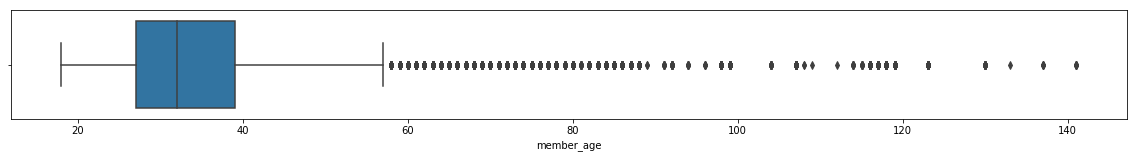

In [29]:
# Plot member age distibution
plt.figure(figsize = [20, 2])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_clean, x='member_age', color=base_color);

In [30]:
df_clean.member_age.describe(percentiles = [0.01, 0.05, 0.95, 0.99])

count    2.167390e+06
mean     3.432707e+01
std      1.022624e+01
min      1.800000e+01
1%       1.900000e+01
5%       2.200000e+01
50%      3.200000e+01
95%      5.500000e+01
99%      6.400000e+01
max      1.410000e+02
Name: member_age, dtype: float64

> From above, the youngest users are 18 which makes sense. However, 95% percentile combined with box plot shows older users above 55 year old seems to be outliers. It is logical that rows above 60 yrs old should be removed.

**Define 5.1** <br>
**`member_age`** outlier should be removed

**Code 5.1**

In [31]:
# Remove all rows with age <= 60
df_clean = df_clean.query('member_age <= 60')

**Test 5.1**

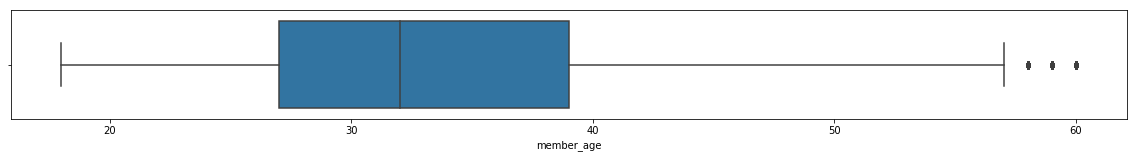

In [32]:
# Plot member age <= 60 yrs distibution
plt.figure(figsize = [20, 2])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_clean, x='member_age', color=base_color);

**Define 5.2** <br>
Add **`age_group`** label column 

**Code 5.2**

In [33]:
# Add age_group label column
labels = ["{}s".format(i) for i in range(10,51,10)]
df_clean['age_group'] = pd.cut(df_clean['member_age'], range(10, 61, 10), right=True, labels=labels)

**Test 5.2**

In [34]:
# Test member age and their age_group
df_clean[['age_group','member_age']].sample(5)

,age_group,member_age
1721756,30s,31
470748,20s,24
1163952,20s,22
2265206,30s,31
609213,20s,30


In [35]:
df_clean['age_group'].isna().any()

False

**Define 6** <br>
**`bike_share_for_all_trip`** column should be boolean

In [36]:
df_clean.bike_share_for_all_trip.replace({'Yes':True, 'No':False}, inplace=True)

**Test 6**

In [37]:
df_clean.bike_share_for_all_trip.dtypes

dtype('bool')

**Define 7**<br>
**`user_type`**, **`member_gender`**, **`age_group`**, **`month`**, **`weekday`** and **`hour`** should be categorical variables

**Code 7**

In [38]:
# Converted to categorical 
df_clean['user_type']=df_clean['user_type'].astype('category')
df_clean['member_gender']=df_clean['member_gender'].astype('category')
df_clean['age_group']=df_clean['age_group'].astype('category')
df_clean['month']=df_clean['month'].astype('category')
df_clean['weekday']=df_clean['weekday'].astype('category')
df_clean['hour']=df_clean['hour'].astype('category')
df_clean['start_metro_area']=df_clean['start_metro_area'].astype('category')
df_clean['end_metro_area']=df_clean['end_metro_area'].astype('category')

**Test 7**

In [39]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip              bool
start_metro_area                 category
end_metro_area                   category
month                            category
weekday                          category
hour                             category
member_age                          int64
age_group                        category
dtype: object

In [40]:
df_clean.member_gender.value_counts()

Male      1562587
Female     525829
Other       37308
Name: member_gender, dtype: int64

**Define 8** <br>
**`duration_sec`** has many large values maybe outlier due to customers forgot to log off after using

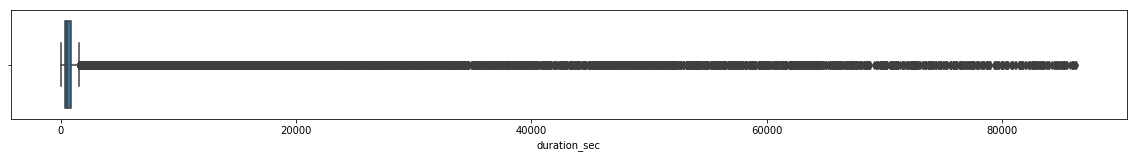

In [41]:
# Plot duration distibution
plt.figure(figsize = [20, 2])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_clean, x='duration_sec', color=base_color);

In [42]:
df_clean.duration_sec.describe(percentiles = [0.01, 0.05, 0.95, 0.99])

count    2.125724e+06
mean     7.656091e+02
std      1.829231e+03
min      6.100000e+01
1%       1.060000e+02
5%       1.740000e+02
50%      5.420000e+02
95%      1.672000e+03
99%      3.741000e+03
max      8.628100e+04
Name: duration_sec, dtype: float64

**Code 8**

In [43]:
# Remove duration outliers
df_clean = df_clean.query('duration_sec <= 6000')

**Test 8**

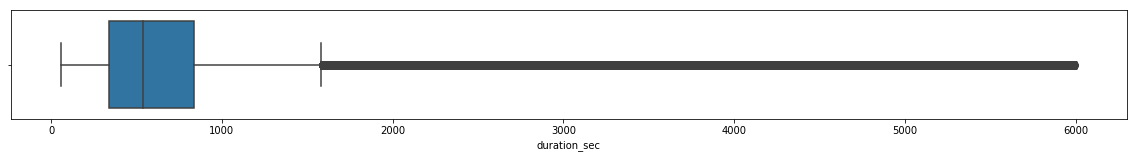

In [44]:
# Plot duration < 6000 sec distibution
plt.figure(figsize = [20, 2])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_clean, x='duration_sec', color=base_color);

**Define 9**<br>
 Set orders of categorical variables: **`age_group`**, **`member_gender`**, **`weekday`** and **`month`**

**Code 9**

In [45]:
# Set order of each categorical variable

# age_group
df_clean['age_group'] = pd.Categorical(df_clean['age_group'], ['10s', '20s', '30s', '40s', '50s'])
# member_gender
df_clean['member_gender'] = pd.Categorical(df_clean['member_gender'], ['Male','Female','Other'])
# weekday
df_clean['weekday'] = pd.Categorical(df_clean['weekday'], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# month
df_clean['month'] = pd.Categorical(df_clean['month'], [6,7,8,9,10,11,12,1,2,3,4,5])


**Test 9**

In [46]:
df_clean.weekday.value_counts().index.categories

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

### Final df_clean

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114592 entries, 8 to 2293591
Data columns (total 23 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           int32
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int32
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          int32
member_gender              category
bike_share_for_all_trip    bool
start_metro_area           category
end_metro_area             category
month                      category
weekday                    category
hour                       category
member_age                 int64
age_group                  category
dtypes: bool(1), category(8), datetime64[ns](2), float64(4), int32(3), int64(

## 1.Univariate Exploration

### 1.1 Duration Distribution

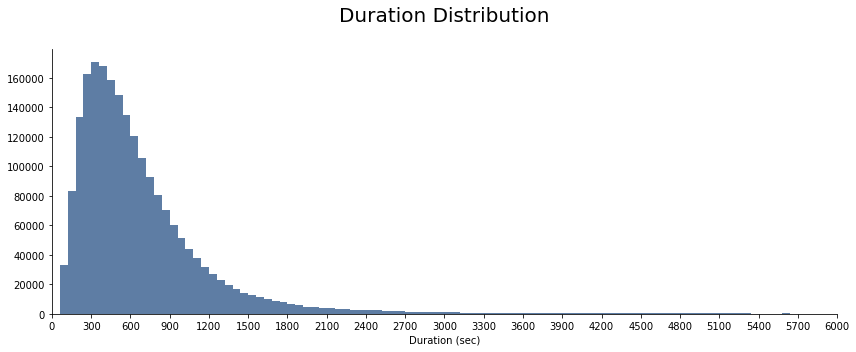

In [48]:
# Set bin size and color
bin_size = 60
bins = np.arange(0, df_clean.duration_sec.max()+bin_size, bin_size)
color = sns.color_palette('viridis')[1]

# Plotting
fig, axes = plt.subplots(figsize = (12,5))
plt.hist(df_clean.duration_sec, bins = bins, color= color, alpha=0.8);

# Aesthetic wrangling
plt.xticks(ticks = [x for x in range(0,6001,300)])
plt.title('Duration Distribution\n', size=20)
plt.xlabel('Duration (sec)')
plt.xlim(0,6000)
sns.despine(fig)
plt.tight_layout();

> From above graph, we can see the most rides takes **within 5-10 minutes** (300-600 secs). Durations dramaticlly higher are outliers probably due to user forgot to log out after finish their ride.

### 1.2 Age Distribution

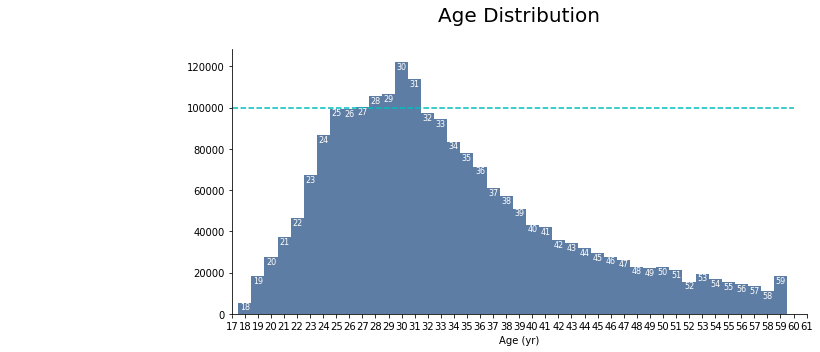

In [49]:
# Set bin size equal to 1 yr and color
bin_size = 1
bins = np.arange(0, df_clean.member_age.max()+bin_size, bin_size)
color = sns.color_palette('viridis')[1]

# Plotting 
fig, ax = plt.subplots(figsize = (12,5))
plt.hist(df_clean.member_age, bins = bins, color= color, align="left", alpha=0.8)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_x()+0.5), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', va='top', color = "white", size=8)

# Aesthetic wrangling
plt.xticks(ticks = [x for x in range(0,70,1)])
plt.xlim((17,61))
plt.title('Age Distribution\n', size=20)
plt.xlabel('Age (yr)')
plt.hlines(100000, 0, 60, colors = "c", linestyles = "dashed")
sns.despine(fig)
plt.tight_layout();

> From graph above, we can see people from **27 to 31** years old use the GoBike over **100,000 times**. Customers could have given the wrong birth year information that cause the super old age data outliers.

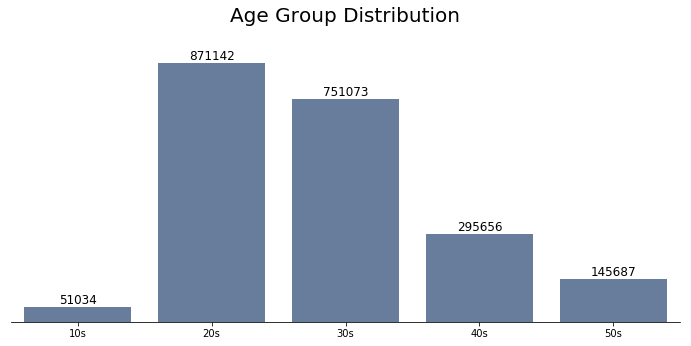

In [50]:
# Plotting 
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x = "age_group", data = df_clean,
              color = sns.color_palette('viridis')[1],
              order = ['10s','20s','30s','40s','50s'], 
              # order by age_group
              alpha=0.8)

# Aesthetic wrangling
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color = "black", size=12)
plt.title('Age Group Distribution\n', size=20)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.xlabel("");

### 1.3 Gender Distibution

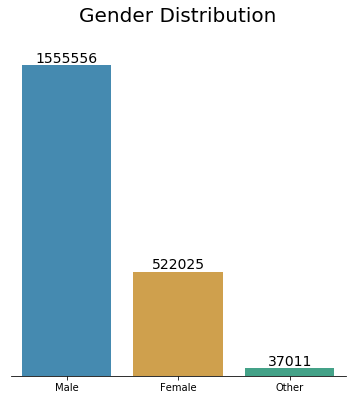

In [51]:
# Plotting 
fig, ax = plt.subplots(figsize = (6,6))
#color = sns.color_palette('colorblind')[10]
sns.countplot(x = "member_gender", data = df_clean, 
              order = df_clean['member_gender'].value_counts().index,
              palette = sns.color_palette('colorblind'), alpha=0.8)

# Aesthetic wrangling
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color = "black", size=14)
plt.title('Gender Distribution\n', size=20)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.xlabel("");

> From graph above, _male users_ are about **3 times** as many as _female users_.

### 1.4 User Types Distribution

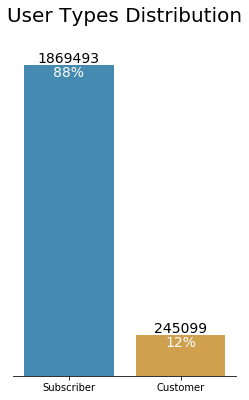

In [52]:
# Plotting 
fig, ax = plt.subplots(figsize = (4,6))
#color = sns.color_palette('colorblind')[10]
sns.countplot(x = "user_type", data = df_clean, 
              order = df_clean['user_type'].value_counts().index,
              palette = sns.color_palette('colorblind'), alpha=0.8)

# Percentage for each age-group
perc_list = []

# Calculate % for 2 user types for each age_group
type_sum = df_clean['user_type'].value_counts().to_list()
total_sum = df_clean.shape[0]
# arrange the % list in same as annotate loop order
for i in range(0,len(type_sum)):
    percent = int(round(100 * type_sum[i] / total_sum))
    perc_list.append(percent) 
# Annotate each bar
i=0
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=14)
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="top", color='white', size=14)
    i+=1

# Aesthetic wrangling
plt.title('User Types Distribution\n', size=20)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.xlabel("");

> From graph above, **most of the users are members which is about 7.6 times as many as casual users**.

### 1.5 Month Distribution

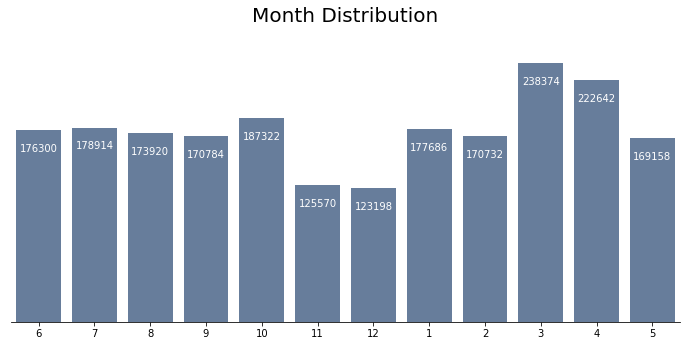

In [53]:
# Plotting 
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x = "month", data = df_clean,
              color = sns.color_palette('viridis')[1], alpha=0.8)

# Aesthetic wrangling
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()+0.5), 
                (p.get_x()+p.get_width()/2, p.get_height()-20000), 
                color="white", size=10, ha='center')
plt.title('Month Distribution\n', size=20)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.xlabel("");

> From graph above, **March and April have high usage over 200,000** and **November and December's usage all below 130,000**. This probably due to weather reasons. Hot summer season and cold winter season prevent users from riding. I also suspect holiday season could be reason for the dramatic dropNovember and December, and school summer vacations could be reason for the drop in May.

### 1.6 Weekday Distribution

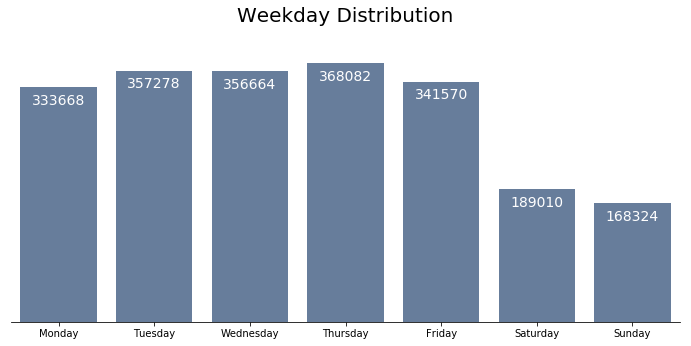

In [54]:
# Plotting 
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x = "weekday", data = df_clean,
              color = sns.color_palette('viridis')[1],
              order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 
              # order by weekday
              alpha=0.8)

# Aesthetic wrangling
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()+0.5), 
                (p.get_x()+p.get_width()/2, p.get_height()-25000), 
                color="white", size=14, ha='center')
plt.title('Weekday Distribution\n', size=20)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.xlabel("");

> From graph above, **weekday usage is higher than weekend usage by almost 2 times**.

### 1.7 Hour Distribution

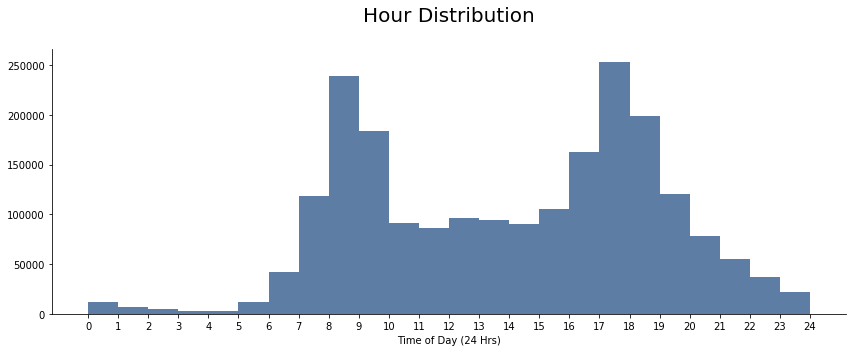

In [55]:
# Customers could have given the wrong birth year information that cause the super old age data outliers 

# Set bin size equal to 1 yr and color
bin_size = 1
bins = np.arange(0, 24+bin_size, bin_size)
color = sns.color_palette('viridis')[1]

# Plotting 
fig, ax = plt.subplots(figsize = (12,5))
plt.hist(df_clean.hour, bins = bins, color= color, align="mid", alpha=0.8)

# Aesthetic wrangling
plt.xticks(ticks = [x for x in range(0,25,1)])
plt.title('Hour Distribution\n', size=20)
plt.xlabel('Time of Day (24 Hrs)')
sns.despine(fig)
plt.tight_layout();

> From graph above, there are **two peaks** of traffic during the day **around 8-9am** and **5-6pm**. The times correspond to the morning and evening rush hours so I believe people go to and leave from work are using the bike to commute between home, office or Bart(connect to other transportations).

### 1.8 Most Popular Starting/Ending Stations

In [56]:
# Most Popular Starting Stations
df_top_start_stations = df_clean['start_station_name'].value_counts()[:10]
df_top_start_stations

San Francisco Caltrain Station 2  (Townsend St at 4th St)    44242
Market St at 10th St                                         40930
San Francisco Ferry Building (Harry Bridges Plaza)           36419
Berry St at 4th St                                           36212
San Francisco Caltrain (Townsend St at 4th St)               34656
Montgomery St BART Station (Market St at 2nd St)             34525
Powell St BART Station (Market St at 4th St)                 33341
Steuart St at Market St                                      30223
The Embarcadero at Sansome St                                29623
Howard St at Beale St                                        28430
Name: start_station_name, dtype: int64

In [57]:
# Most Popular Ending Stations
df_top_end_stations = df_clean['end_station_name'].value_counts()[:10]
df_top_end_stations

San Francisco Caltrain Station 2  (Townsend St at 4th St)    61497
San Francisco Ferry Building (Harry Bridges Plaza)           43118
Market St at 10th St                                         41256
Montgomery St BART Station (Market St at 2nd St)             40141
San Francisco Caltrain (Townsend St at 4th St)               38192
Berry St at 4th St                                           35019
Powell St BART Station (Market St at 4th St)                 34978
The Embarcadero at Sansome St                                33589
Steuart St at Market St                                      31167
Powell St BART Station (Market St at 5th St)                 28583
Name: end_station_name, dtype: int64

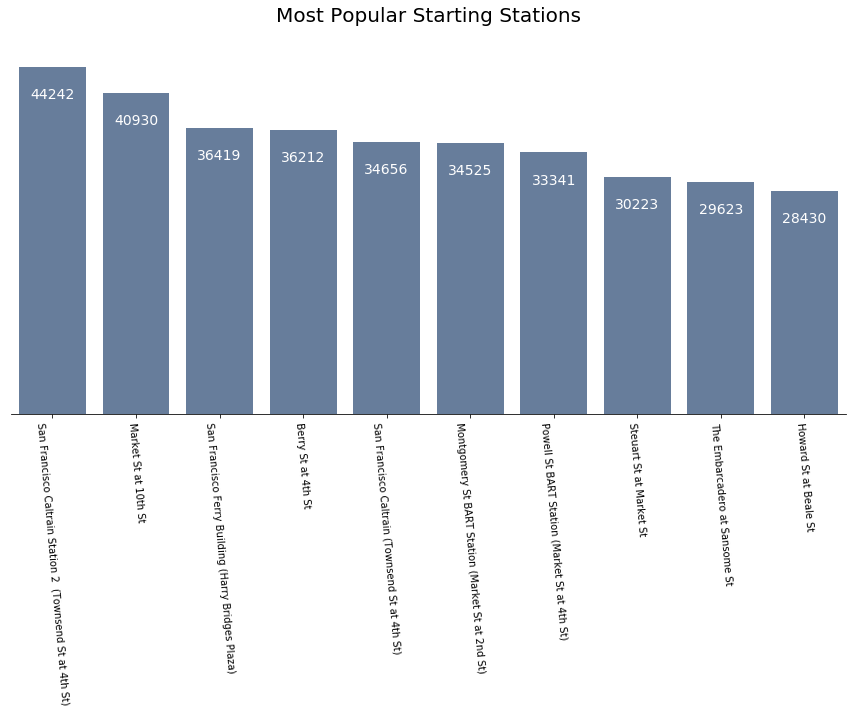

In [58]:
# Plotting the 
fig, ax = plt.subplots(figsize = (12,10))
sns.barplot(df_top_start_stations.index, df_top_start_stations.values, alpha=.8, color = sns.color_palette("viridis")[1])

# Add annotation for each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x()+p.get_width()/2, p.get_height()-4000), 
                color = "white", size=14, ha='center')
# Remove axes
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
# Add title
plt.title('Most Popular Starting Stations\n', size=20)
# Rotate x label
plt.xticks(rotation=-85)
plt.tight_layout();

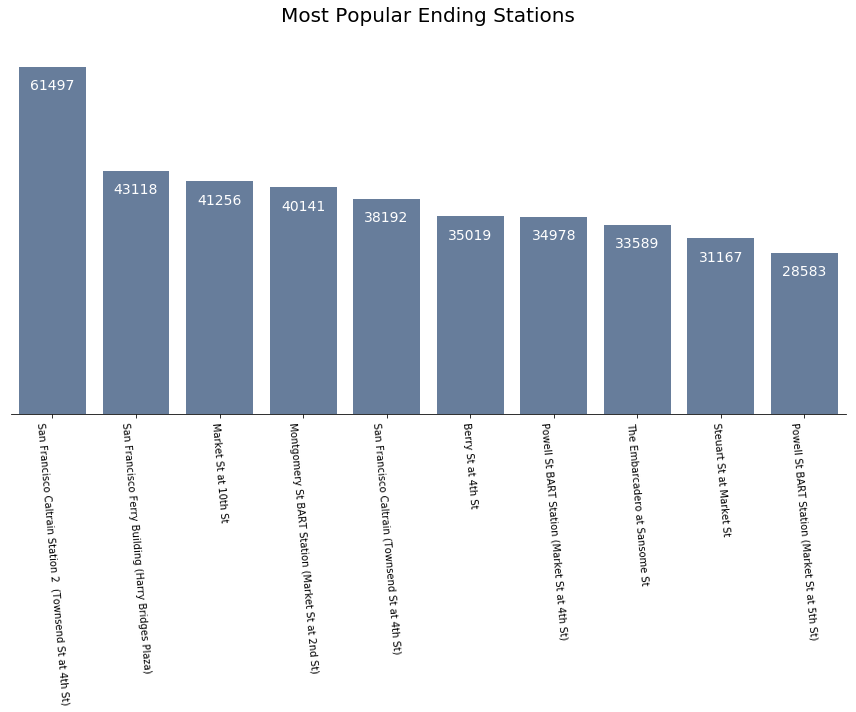

In [59]:
# Plotting the 
fig, ax = plt.subplots(figsize = (12,10))
sns.barplot(df_top_end_stations.index, df_top_end_stations.values, 
            alpha=0.8, color = sns.color_palette("viridis")[1])

# Add annotation for each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()-4000), 
                color = "white", size=14, ha='center')
# Remove axes
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
# Add title
plt.title('Most Popular Ending Stations\n', size=20)
# Rotate x label
plt.xticks(rotation=-85)
plt.tight_layout();

> From graph above, **most popular starting stations are in SF area**. And the fact that popular GoBike stations are near Bart or Caltrain stations confirms the idea **people use bike to commute between public transportation and work/home**.

## Area Distribution of Bike Activity
> Most bike riding activities happened in **San Francisco area**. This is make sense because SF is the first location of GoBike. Among the **2114592** bike activity in df_clean, only **65 inter-area rides**.

In [60]:
# Area Distribution of Bike Activity
df_clean.start_metro_area.value_counts()

San Francisco    1545170
East Bay          470544
San Jose           98878
Name: start_metro_area, dtype: int64

In [61]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # Compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # Add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

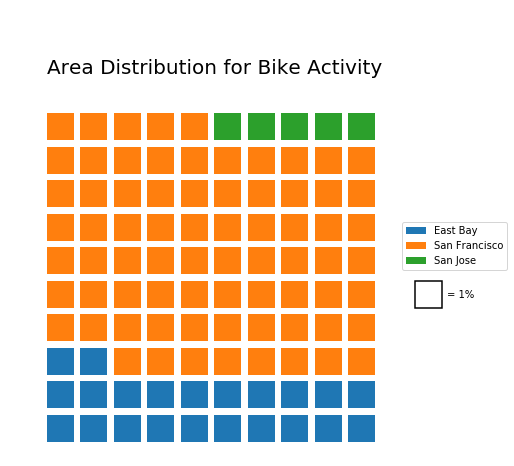

In [62]:
plt.figure(figsize=[8,8])
city_counts = percentage_blocks(df_clean, 'start_metro_area')

prev_count = 0
# For each category,
for cat in range(city_counts.shape[0]):
    # Get the block indices
    blocks = np.arange(prev_count, prev_count + city_counts[cat])
    # And put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += city_counts[cat]

# Aesthetic wrangling
plt.text(-0.4, 11,'Area Distribution for Bike Activity', size=20)
plt.text(11.55, 4.4,'= 1%', va = 'center')
plt.bar(11, 0.8, 0.8, 4, color = 'white', edgecolor = 'black', lw = 1.5)
plt.legend(city_counts.sort_index().index, bbox_to_anchor = (0.85, 0.45), loc = 6)
plt.axis('off')
plt.axis('square');

> From graph above, most bike riding activities happened in **San Francisco area**. This is make sense because SF is the first location of GoBike. I am curious about if there is any ride that starting from one area but end in another area. 

### 1.10 Inter-area Bike Activity

In [63]:
# Trips that started from one area but ended in another
df_long_trip = df_clean[df_clean['start_metro_area'] != df_clean['end_metro_area']]

In [64]:
# How many long distant trips 
df_long_trip.shape[0]

65

><li> Folium Mudule Tutorial: <a href="https://medium.com/@bobhaffner/folium-lines-with-arrows-25a0fe88e4e">here</a>

In [65]:
# Plot routes 
starting_point = (37.755, -122.3)
  
# Create empty map zoomed in on Bay Area
start_map = folium.Map(location=starting_point, tiles='cartodbpositron', zoom_start=11)
 
# Add a marker for every record in the filtered data, use a clustered view
for num in range(0,df_long_trip.shape[0]):
    p1 = (df_long_trip['start_station_latitude'].iloc[num], df_long_trip['start_station_longitude'].iloc[num])
    p2 = (df_long_trip['end_station_latitude'].iloc[num], df_long_trip['end_station_longitude'].iloc[num])
    folium.Marker(location = p1, icon = folium.Icon(color='lightgreen')).add_to(start_map)
    folium.Marker(location = p2, icon = folium.Icon(color='lightred')).add_to(start_map)
    folium.PolyLine(locations=[p1, p2], color='blue', weight = 1.5, line_opacity = 0.1).add_to(start_map)
# Show the map
start_map

In [66]:
df_long_trip.user_type.value_counts() / df_long_trip.shape[0]

Subscriber    0.892308
Customer      0.107692
Name: user_type, dtype: float64

> Among the **2114592** bike activity in df_clean, only **65 inter-area rides**.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 01. **`Duration`** has outliers with _unusual long time of usage_. This could be user forgetting to log off the app when finish using the bike. <br>
> 02. **`Age`** has outliers with _user older than 100 years old_. This could be user giving wrong/random birth year informations during registration. I cut off the data above 60 year old which is not relevent for the analysis and only consist small part of whole data.  
> 03. **`Gender`** has NaN values and dropped during data cleaning.
> 04. **`Month`**, **`Weekday`** and **`Hour`** are directly get from original data.
> 05. **`Location`** has outliers far from Bay Area and have been removed. Those bikes could be missing or stolen.
> 06. **`Route`** has no obvious outlier because I removed all locations that too far from Bay Area.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 01. From **`duration`** graph, we can see the most rides takes **within 5-10 minutes** (300-600 secs). Durations dramaticlly higher are outliers probably due to user forgot to log out after finish their ride.
> 02. From **`age`** graph, we can see people from **27 to 31** years old use the GoBike over **100,000 times**. Customers could have given the wrong birth year information that cause the super old age data outliers.
> 03. From **`gender`** graph, male users are about **3 times** as many as female users.
> 04. From **`user_type`** graph, most of the users are members which is about **7.6 times** as many as casual users.
> 05. From **`month`** graph, **March and April have high usage over 200,000** and **November and December's usage all below 130,000**. This probably due to weather reasons. Hot summer season and cold winter season prevent users from riding. I also suspect holiday season could be reason for the dramatic dropNovember and December, and school summer vacations could be reason for the drop in May.
> 06. From **`weekday`** graph, weekday usage is higher than weekend usage by **almost 2 times**.
> 07. From **`hour`** graph, there are **two peaks** of traffic during the day **around 8-9am** and **5-6pm**. The times correspond to the morning and evening rush hours so I believe people go to and leave from work are using the bike to commute between home, office or Bart(connect to other transportations).
> 08. From **`Most Popular Starting/Ending Stations`** graph, most popular starting stations are in SF area. And the fact that popular GoBike stations are near Bart or Caltrain stations confirms the idea people use bike to commute between public transportation and work/home.
> 09. From **`Area Distribution for Bike Activity`** graph, most bike riding activities happened in **San Francisco area**. This is make sense because SF is the first location of GoBike. I am curious about if there is any ride that starting from one area but end in another area. 
> 10. **`Inter-area Bike Activity`** graph, among the **2114592** bike activity in df_clean, only **65** inter-area rides. All of the rides are between SF and oakland across the Bay Bridge.

## 2. Bivariate Exploration

### 2.1 **`Numerical Variables`** vs. **`Numerical Variables`**

In [67]:
# Numeric Variables and Categorical Variables
numeric_vars = ['duration_sec', 'member_age']
categoric_vars = ['user_type', 'member_gender',
                  'age_group', 'month', 'weekday', 'hour', 
                  'start_metro_area', 'end_metro_area']

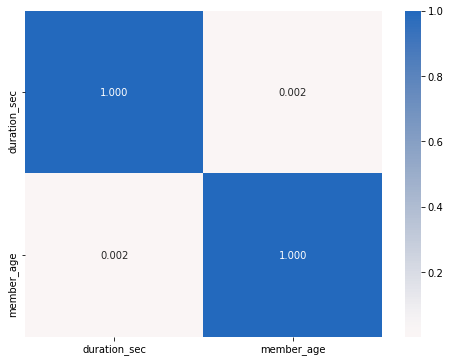

In [68]:
# Correlation plot
plt.figure(figsize = [8, 6])
sns.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

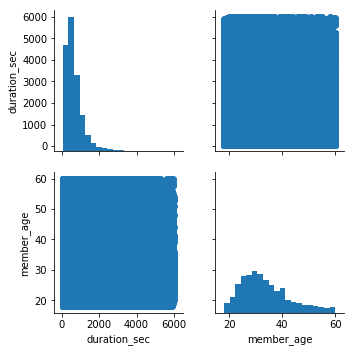

In [69]:
g = sns.PairGrid(data = df_clean, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

> From graph above, **duration** and **age** has no statistical correlation.

### 2.2 **`Numerical Variables`** vs. **`Categorical Variables`**

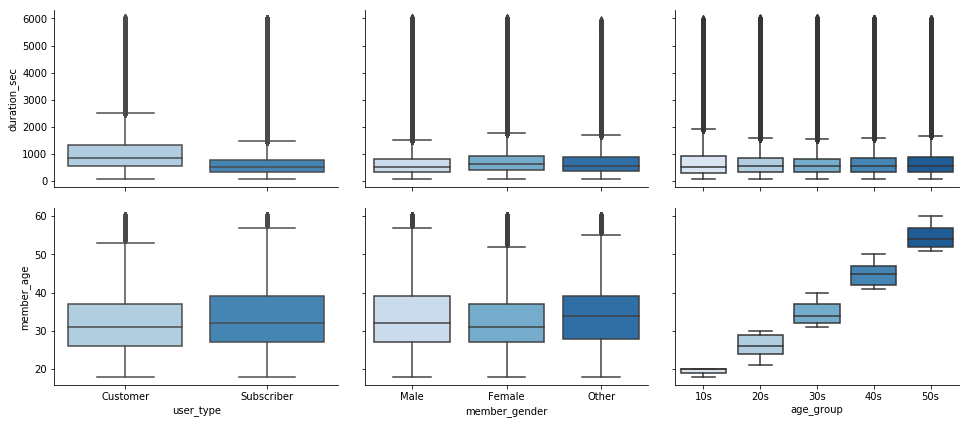

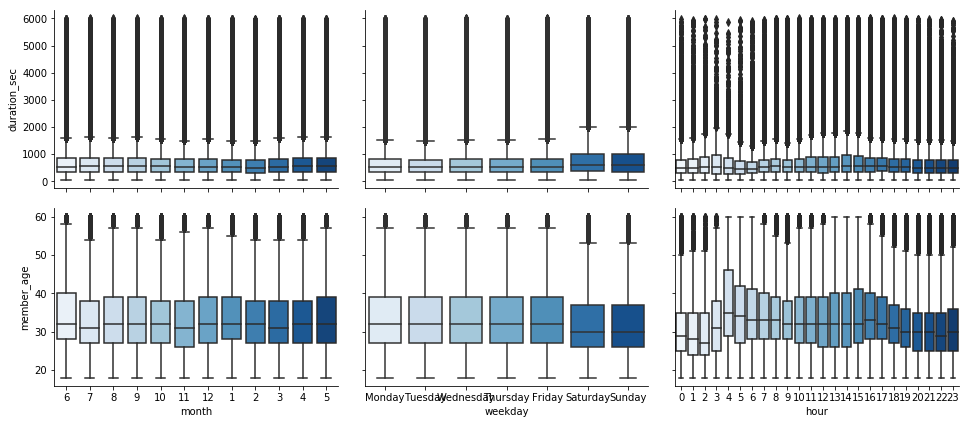

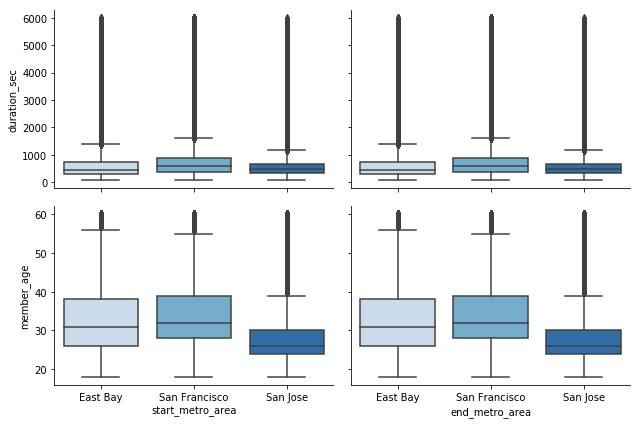

In [70]:
# Plot matrix of numeric features against categorical features.
# Quick hack for creating box plots with seaborn's PairGrid
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sns.boxplot(x, y, palette='Blues', saturation = 0.8)
# Plotting
g1 = sns.PairGrid(data = df_clean, x_vars = categoric_vars[ :3], y_vars = numeric_vars, 
                height = 3, aspect = 1.5)
g2 = sns.PairGrid(data = df_clean, x_vars = categoric_vars[3:6], y_vars = numeric_vars, 
                height = 3, aspect = 1.5)
g3 = sns.PairGrid(data = df_clean, x_vars = categoric_vars[6: ], y_vars = numeric_vars,
                height = 3, aspect = 1.5)
g1.map(boxgrid)
g2.map(boxgrid)
g3.map(boxgrid)
plt.tight_layout();

> From graph above, several observations can be made:
1. **`user_type`**: **registered users have longer duration** than casual users per trip. **registered users are younger** than casual users.
2. **`member_gender`**: all genders have similar duration. **Female user are younger** than other genders.
3. **`weekday`**: **weekends' users are younger** than weekday users and **weekend's trips have longer duration**.
4. **`metro_area`**: **San Jose has the youngest users** and **San Francisco has the longest duration** per trip.

### 2.3 **`Categorical Variables`** vs. **`Categorical Variables`**

#### 2.3.1 **`user_type`** vs. **`age_group`**

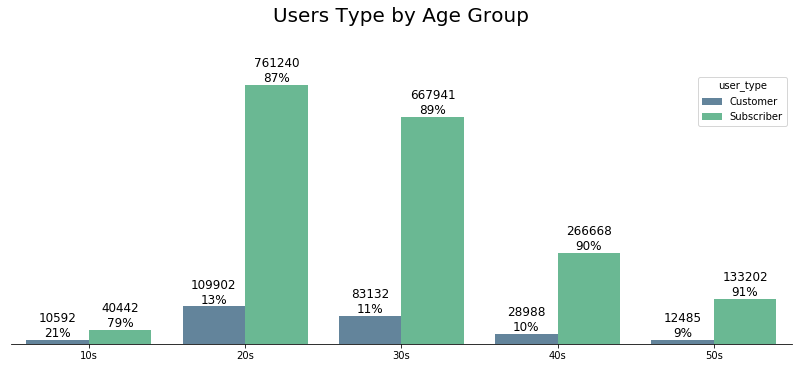

In [71]:
fig, ax = plt.subplots(figsize = (14,5))

# Plotting
sns.countplot(x = "age_group", data = df_clean, 
              palette = "viridis", hue = "user_type", alpha = 0.8)

# Percentage for each age-group
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each age_group
type_sum = df_clean.groupby('age_group')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean['age_group'].value_counts().sort_index().to_list()

# arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber
   
# Annotate each bar
i=0
for p in ax.patches:
    ax.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=12)
    i+=1

# Aesthetic wrangling
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.title("Users Type by Age Group\n\n", fontsize= 20)
plt.xlabel("");

> From graph above, user's **subscription _ratio_ increases as the age increase**. Younger user tend to use the service but do not subscribe. 

#### 2.3.2 **`user_type`** vs. **`member_gender`**

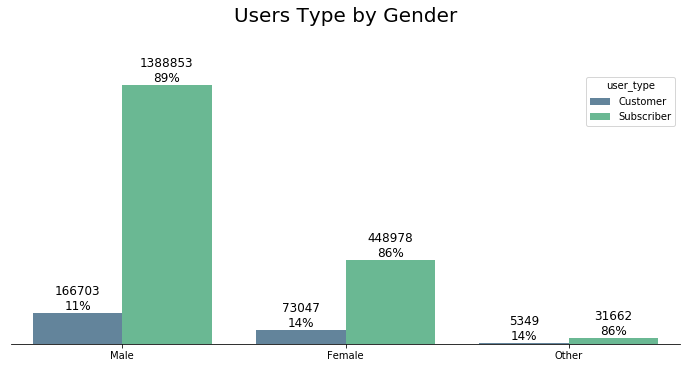

In [72]:
fig, ax = plt.subplots(figsize = (12,5))

# Plotting
sns.countplot(x = "member_gender", data = df_clean, 
              palette = "viridis", hue = "user_type", alpha = 0.8)

# Percentage for each gender
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each gender
type_sum = df_clean.groupby('member_gender')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean['member_gender'].value_counts().sort_index().to_list()

# arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Annotate each bar
i=0
for p in ax.patches:
    ax.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=12)
    i+=1

# Aesthetic wrangling
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.title("Users Type by Gender\n\n", fontsize= 20)
plt.xlabel("");

> From graph above, **Male** tend to have the **highest subscribtion rate**. 

#### 2.3.3 **`user_type`** vs. **`hour`**

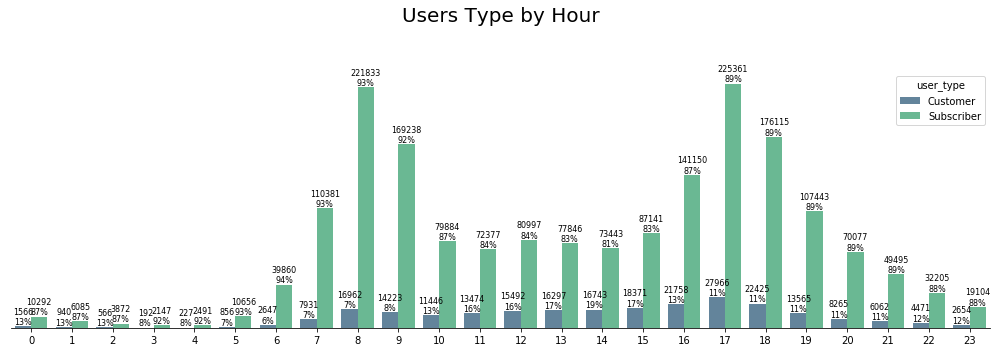

In [73]:
fig, ax = plt.subplots(figsize = (14,5))

# Plotting
sns.countplot(x = "hour", data = df_clean, 
              palette = "viridis", hue = "user_type", alpha = 0.8)

# Percentage for each hour
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each hour
type_sum = df_clean.groupby('hour')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean['hour'].value_counts().sort_index().to_list()

# arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Annotate each bar
i=0
for p in ax.patches:
    ax.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=8)
    i+=1

# Aesthetic wrangling
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.title("Users Type by Hour\n\n", fontsize= 20)
plt.xlabel("")
plt.tight_layout();

> From graph above, user population in the **morning and evening rush hours have the highest subscription ratio**. This makes sense because user rides bike as regular commute to work or home tend to subscribe for the service.

#### 2.3.4 **`user_type`** vs. **`weekday`**

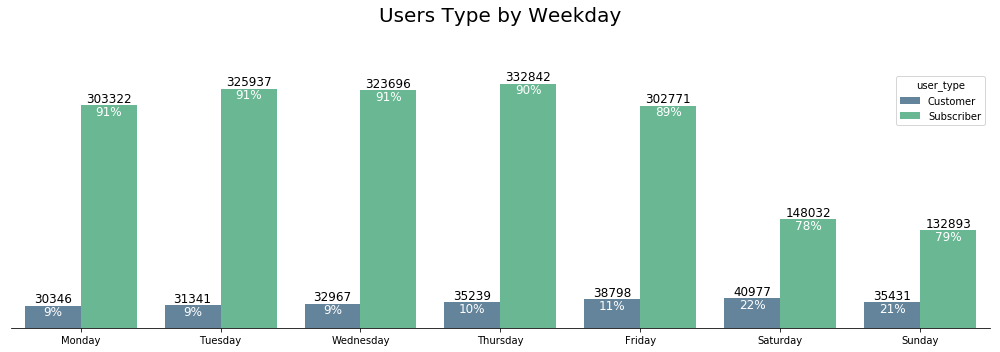

In [74]:
fig, ax = plt.subplots(figsize = (14,5))
# Plotting
sns.countplot(x = "weekday", data = df_clean, 
              palette = "viridis", hue = "user_type", alpha = 0.8)

# Percentage for each day
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each day
type_sum = df_clean.groupby('weekday')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean['weekday'].value_counts().sort_index().to_list()

# arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Annotate each bar
i=0
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=12)
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="top", color='white', size=12)
    i+=1

# Aesthetic wrangling
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.title("Users Type by Weekday\n\n", fontsize= 20)
plt.xlabel("")
plt.tight_layout();

> From graph above, **Saturday** and **Sunday** user populations have unusual **low subscription ratio** and **total rides**. This is probably due to people use the bike for work mostly.

#### 2.3.5 **`user_type`** vs. **`month`**

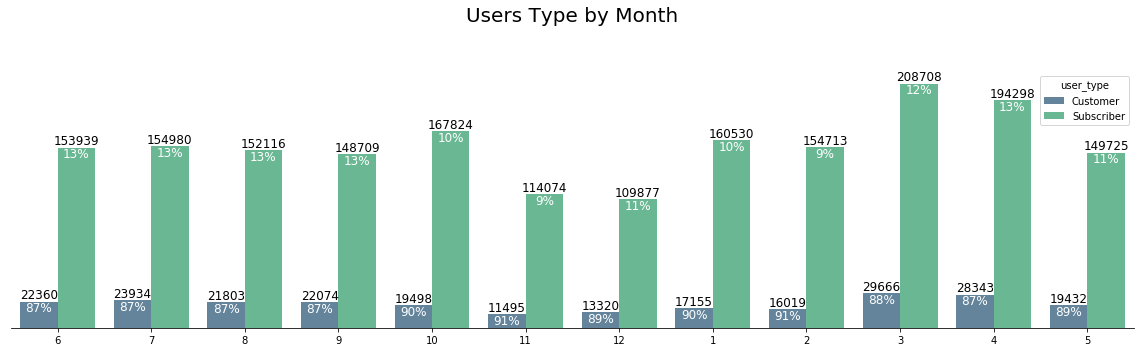

In [75]:
fig, ax = plt.subplots(figsize = (16,5))

# Plotting
sns.countplot(x = "month", data = df_clean, 
              palette = "viridis", hue = "user_type", alpha = 0.8)

# Percentage for each month
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each month
type_sum = df_clean.groupby('month')['user_type'].value_counts().to_list()
total_sum = df_clean['month'].value_counts().sort_index().to_list()

# arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Annotate each bar
i=0
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=12)
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="top", color='white', size=12)
    i+=1

# Aesthetic wrangling
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.title("Users Type by Month\n\n", fontsize= 20)
plt.xlabel("")
plt.tight_layout();

> From graph above, monthly rides number fluctuated through the year. The ratio of subscriber are low when total monthly rides number is high. And the ratio of subscriber are high when monthly number is low. This indicates subscribers have **higher stickiness** and **lower sensitivity** than casual customers.

## **`long_trip`** and **`user_type`**
> All of the rides are between SF and oakland across the Bay Bridge and **58 trips (~90%)** are from subscribers.

In [76]:
# Plot routes 
starting_point = (37.755, -122.3)
# Create empty map zoomed in on Bay Area
start_map = folium.Map(location=starting_point, tiles='cartodbpositron', zoom_start=11)

# Create long trip df for diff. user types
df_long_trip_subscriber = df_long_trip.query("user_type== 'Subscriber'")
df_long_trip_customer = df_long_trip.query("user_type== 'Customer'")
 
# For Subscriber
for num in range(0,df_long_trip_subscriber.shape[0]):
    # Subscriber start/end location
    p_start_subscriber = (df_long_trip_subscriber['start_station_latitude'].iloc[num],
                          df_long_trip_subscriber['start_station_longitude'].iloc[num])
    p_end_subscriber = (df_long_trip_subscriber['end_station_latitude'].iloc[num],
                        df_long_trip_subscriber['end_station_longitude'].iloc[num])
    # Add markers
    folium.Marker(location = p_start_subscriber, icon = folium.Icon(color='lightgreen')).add_to(start_map)
    folium.Marker(location = p_end_subscriber, icon = folium.Icon(color='lightred')).add_to(start_map)
    folium.PolyLine(locations=[p_start_subscriber, p_end_subscriber], color='lightpink', weight=2, line_opacity = 0.1).add_to(start_map)

# For Customer
for num in range(0,df_long_trip_customer.shape[0]):    
    # Customer start/end location
    p_start_customer = (df_long_trip_customer['start_station_latitude'].iloc[num],
                        df_long_trip_customer['start_station_longitude'].iloc[num])
    p_end_customer = (df_long_trip_customer['end_station_latitude'].iloc[num],
                        df_long_trip_customer['end_station_longitude'].iloc[num])

    folium.Marker(location = p_start_customer, icon = folium.Icon(color='lightgreen')).add_to(start_map)
    folium.Marker(location = p_end_customer, icon = folium.Icon(color='lightred')).add_to(start_map)
    
    folium.PolyLine(locations=[p_start_customer, p_end_customer], color='yellow', weight=1.5, line_opacity = 0.1).add_to(start_map)


# Show the map
start_map

##### Annotations:
> `light green markers`: Starting stations <br>
> `light red markers`: Ending stations <br>
> `yellow line`: Customer routes<br>
> `pink line`: Subscriber routes

> From graph above, all of the rides are between SF and oakland across the Bay Bridge and **58 trips (~90%)** are from subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### 2.1 **`Numerical Variables`** vs. **`Numerical Variables`**
> 01. **duration** and **age** has no statistical correlation. <br>

#### 2.2 **`Numerical Variables`** vs. **`Categorical Variables`**
>01. **`user_type`**: **registered users have longer duration** than casual users per trip. **registered users are younger** than casual users.
>02. **`member_gender`**: all genders have similar duration. **Female user are younger** than other genders.
>03. **`weekday`**: **weekends' users are younger** than weekday users and **weekend's trips have longer duration**.
>04. **`metro_area`**: **San Jose has the youngest users** and **San Francisco has the longest duration** per trip.

#### 2.3 **`Categorical Variables`** vs. **`Categorical Variables`**
> 01. From **`user_type`** vs. **`age_group`** graph, user's **subscription _ratio_ increases as the age increase**. Younger user tend to use the service but do not subscribe. 
> 02. From **`user_type`** vs. **`member_gender`** graph, **Male** tend to have the **highest subscribtion rate**. 
> 03. From **`user_type`** vs. **`hour`** graph, user population in the **morning and evening rush hours have the highest subscription ratio**. This makes sense because user rides bike as regular commute to work or home tend to subscribe for the service.
> 04. From **`user_type`** vs. **`weekday`** graph, **Saturday** and **Sunday** user populations have unusual **low subscription ratio** and **total rides**. This is probably due to people use the bike for work mostly.
> 05. From **`user_type`** vs. **`month`** graph, monthly rides number fluctuated through the year. The ratio of subscriber are low when total monthly rides number is high. And the ratio of subscriber are high when monthly number is low. This indicates subscribers have **higher stickiness** and **lower sensitivity** than casual customers.

#### 2.4 **`long_trip`** and **`user_type`**
> 01. From **`long_trip`** and **`user_type`** graph, all of the rides are between SF and oakland across the Bay Bridge and **58 trips (~90%)** are from subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 01. From **`user_type`** vs. **`weekday`** graph, **Wednesday** and **Thursday** user populations have unusual **low subscription ratio** but the total rides counts not significantly different from weekday traffic.

## 3. Multivariate Exploration

## Numerical Variables vs. Categorical Variables hue by User Types
> From **`duration`**, **`member_age`** vs.  **`user_gender`**, **`metro_area`** by **`user_type`** graph, several conclusion can be made:
01. **Subscribers** have **shorter and more concentrated duration range** than **Customers**
02. **San Jose's Subscriber** population is the **youngest**
03. **East Bay's Subscriber** have the **shortest duration**

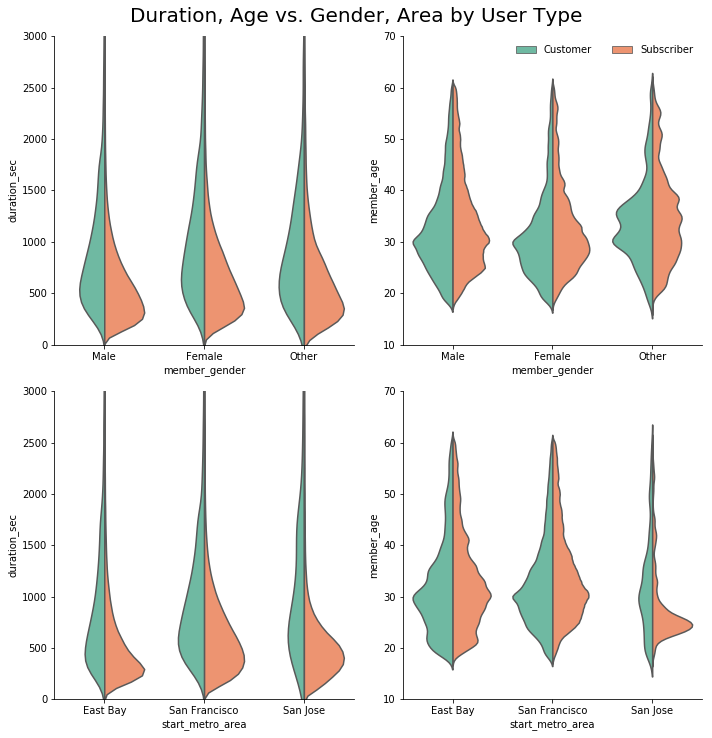

In [77]:
# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 2 , figsize = [10,10])
data = df_clean
var = ['member_gender', 'start_metro_area']
for i in range(0,2):
    sns.violinplot(data=data, x = var[i], y = 'duration_sec', 
                   hue = 'user_type', ax = ax[i,0], palette='Set2',
                   split=True, inner=None, saturation = 0.8)
    ax[i,0].legend().remove()
    ax[i,0].set_ylim(0,3000)
    sns.violinplot(data=data, x = var[i], y = 'member_age', 
                   hue = 'user_type', ax = ax[i,1], palette='Set2',
                   split=True, inner=None, saturation = 0.8)
    ax[i,1].legend().remove()
    ax[i,1].set_ylim(10,70)
sns.despine(fig)
ax[0,1].legend(bbox_to_anchor=(1,1),ncol=2,frameon=False)
plt.suptitle('Duration, Age vs. Gender, Area by User Type',size =20, y=1.02)
plt.tight_layout();

> From graph above, several conclusion can be made:
01. **Subscribers** have **shorter and more concentrated duration range** than **Customers**
02. **San Jose's Subscriber** population is the **youngest**
03. **East Bay's Subscriber** have the **shortest duration**

## **`user_type`** for **`age_group`** by **`metro_area`**
> Majority of users is from **age groups 20s and 30s**. Although San Francisco metro area has most rides but the two largest user populations 20s and 30s age groups have the **lowest subscription ratio**.

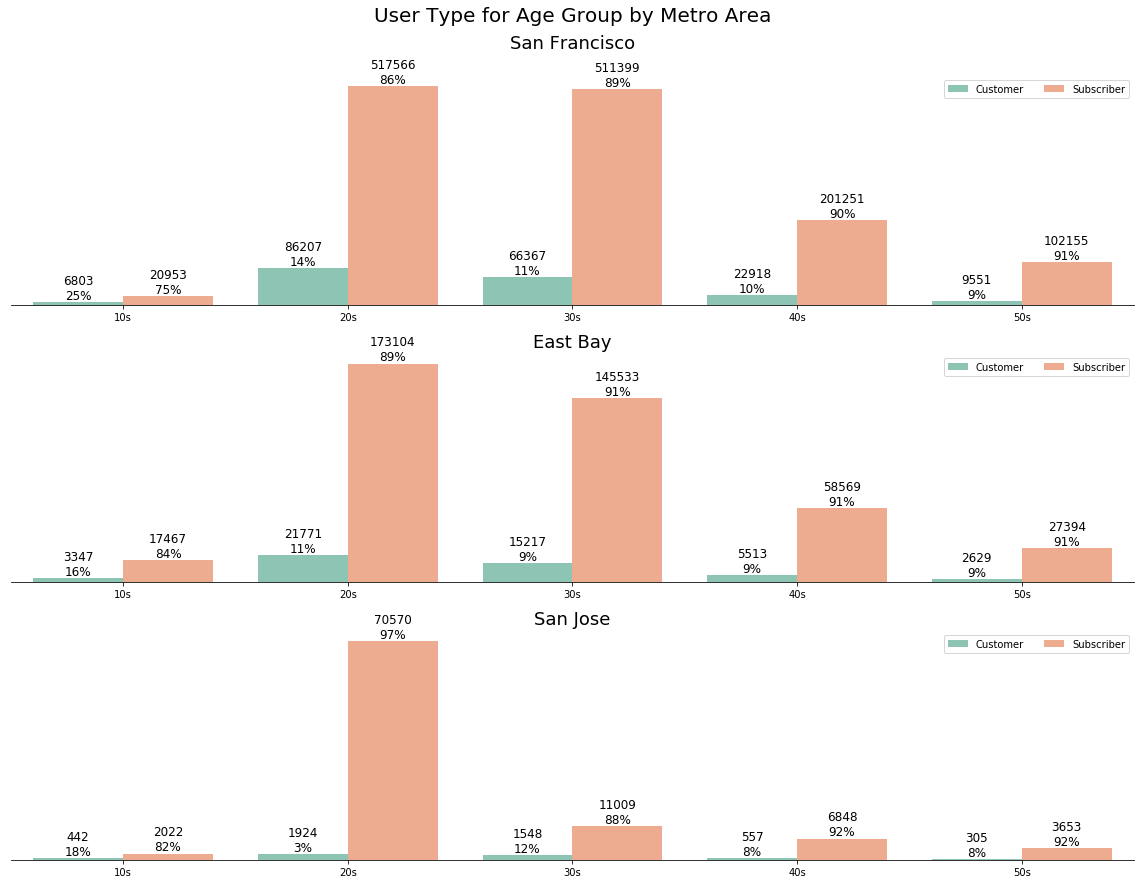

In [78]:
# Since there's only three subplots to create, using the full data should be fine.
fig = plt.figure(figsize = [16, 12])

# Subplot 1: San Francisco, ride count for age_group by user_type
##############################################################
ax1 = plt.subplot(3, 1, 1)
ax1.set_title("San Francisco\n", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "San Francisco"'), 
              x = 'age_group', hue = 'user_type', palette = 'Set2', alpha=0.8)
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax1.legend(loc = 1, ncol = 2)

# Percentage for each age_group
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each age_group
type_sum = df_clean.query('start_metro_area == "San Francisco"').groupby('age_group')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "San Francisco"')['age_group'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax1.patches:
    ax1.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=12)
    i+=1

# Subplot 2: East Bay, ride count for age_group by user_type
##############################################################
ax2 = plt.subplot(3, 1, 2)
ax2.set_title("East Bay", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "East Bay"'), 
              x = 'age_group', hue = 'user_type', palette = "Set2", alpha=0.8)
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax2.legend(loc = 1, ncol = 2)

# Percentage for each age_group
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each age_group
type_sum = df_clean.query('start_metro_area == "East Bay"').groupby('age_group')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "East Bay"')['age_group'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax2.patches:
    ax2.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=12)
    i+=1

# Subplot 3: East Bay, ride count for age_group by user_type
##############################################################
ax3 = plt.subplot(3, 1, 3)
ax3.set_title("San Jose", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "San Jose"'), 
              x = 'age_group', hue = 'user_type', palette = 'Set2', alpha=0.8)
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax3.legend(loc = 1, ncol = 2)
# Percentage for each age_group
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each age_group
type_sum = df_clean.query('start_metro_area == "San Jose"').groupby('age_group')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "San Jose"')['age_group'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax3.patches:
    ax3.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=12)
    i+=1

# Aesthetic Wrangling
fig.suptitle('User Type for Age Group by Metro Area', size=20, y=1.02)
sns.despine(fig, left = True)
plt.tight_layout();

> From graph above, majority of users is from **age groups 20s and 30s**. Although San Francisco metro area has most rides but the two largest user populations 20s and 30s age groups have the **lowest subscription ratio**.

## **`user_type`** for **`month`** by **`metro_area`**
> **San Jose**, as the last area of GoBike started operation, has the **lowest total number of rides for each month**. However, it has the **highest user's subscription ratios for each month**.

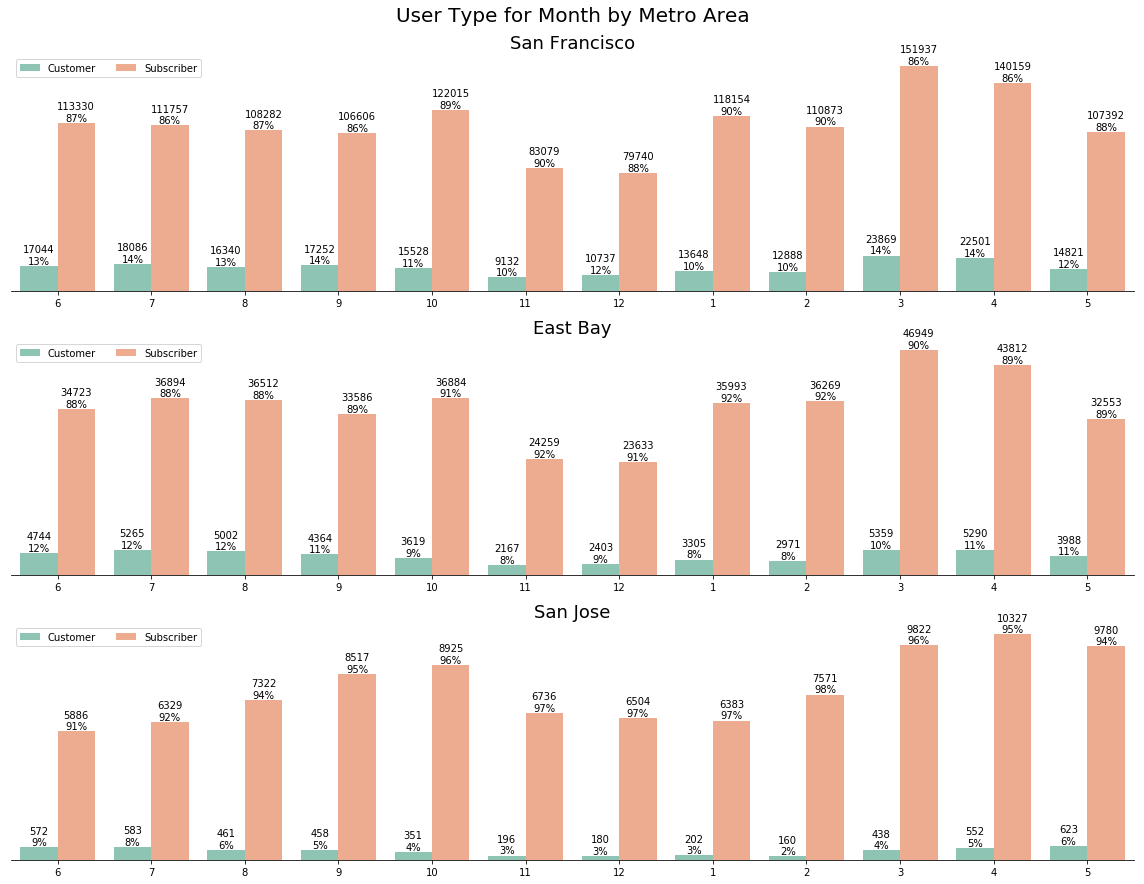

In [79]:
# Since there's only three subplots to create, using the full data should be fine.
fig = plt.figure(figsize = [16, 12])

# Subplot 1: San Francisco, ride count for month by user_type
##############################################################
ax1 = plt.subplot(3, 1, 1)
ax1.set_title("San Francisco", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "San Francisco"'), 
              x = 'month', hue = 'user_type', palette = 'Set2', alpha=0.8,
              order = [6,7,8,9,10,11,12,1,2,3,4,5]) # data start 201806 to 201905
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax1.legend(loc = 2, ncol = 2)

# Percentage for each month
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each month
type_sum = df_clean.query('start_metro_area == "San Francisco"').groupby('month')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "San Francisco"')['month'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax1.patches:
    ax1.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=10)
    i+=1

# subplot 2: East Bay, ride count for month by user_type
##############################################################
ax2 = plt.subplot(3, 1, 2)
ax2.set_title("East Bay", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "East Bay"'), 
              x = 'month', hue = 'user_type', palette = 'Set2', alpha=0.8,
              order = [6,7,8,9,10,11,12,1,2,3,4,5])
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax2.legend(loc = 2, ncol = 2)

# Percentage for each month
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each month
type_sum = df_clean.query('start_metro_area == "East Bay"').groupby('month')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "East Bay"')['month'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax2.patches:
    ax2.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=10)
    i+=1

# Subplot 3: East Bay, ride count for month by user_type
##############################################################
ax3 = plt.subplot(3, 1, 3)
ax3.set_title("San Jose", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "San Jose"'), 
              x = 'month', hue = 'user_type', palette = 'Set2', alpha=0.8,
              order = [6,7,8,9,10,11,12,1,2,3,4,5])
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax3.legend(loc = 2, ncol = 2)
# Percentage for each month
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each month
type_sum = df_clean.query('start_metro_area == "San Jose"').groupby('month')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "San Jose"')['month'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax3.patches:
    ax3.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=10)
    i+=1

# Aesthetic Wrangling
fig.suptitle('User Type for Month by Metro Area', size=20, y=1.02)
sns.despine(fig, left = True)
plt.tight_layout();

> From graph above, **San Jose**, as the last area of GoBike started operation, has the **lowest total number of rides for each month**. However, it has the **highest user's subscription ratios for each month**.

### 3.4 **`user_type`** for **`weekday`** by **`metro_area`**

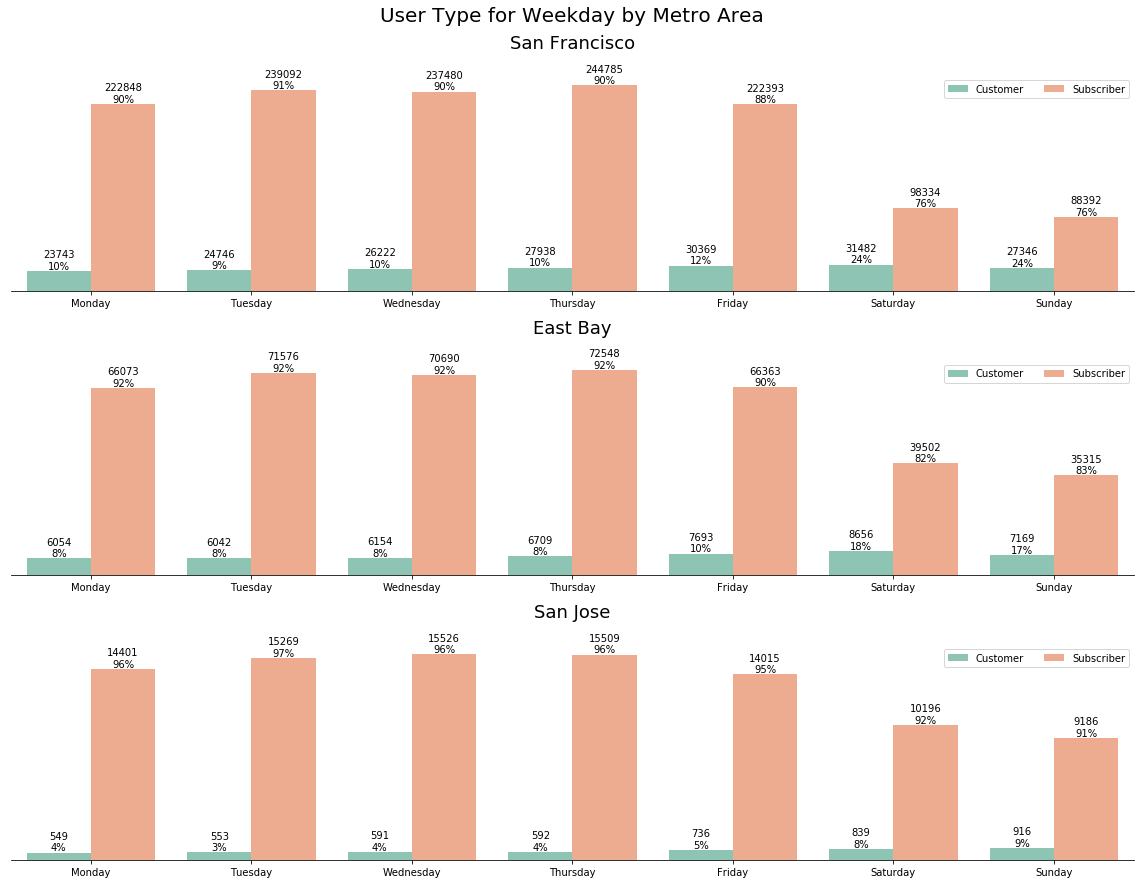

In [80]:
# Since there's only three subplots to create, using the full data should be fine.
fig = plt.figure(figsize = [16, 12])

# Subplot 1: San Francisco, ride count for weekday by user_type
##############################################################
ax1 = plt.subplot(3, 1, 1)
ax1.set_title("San Francisco\n", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "San Francisco"'), 
              x = 'weekday', hue = 'user_type', palette = 'Set2', alpha=0.8) # data start 201806 to 201905
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax1.legend(ncol = 2)

# Percentage for each day
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each day
type_sum = df_clean.query('start_metro_area == "San Francisco"').groupby('weekday')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "San Francisco"')['weekday'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax1.patches:
    ax1.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=10)
    i+=1

# Subplot 2: East Bay, ride count for weekday by user_type
##############################################################
ax2 = plt.subplot(3, 1, 2)
ax2.set_title("East Bay\n", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "East Bay"'), 
              x = 'weekday', hue = 'user_type', palette = 'Set2', alpha=0.8)
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax2.legend(ncol = 2)

# Percentage for each day
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each day
type_sum = df_clean.query('start_metro_area == "East Bay"').groupby('weekday')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "East Bay"')['weekday'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax2.patches:
    ax2.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=10)
    i+=1

# Subplot 3: East Bay, ride count for weekday by user_type
##############################################################
ax3 = plt.subplot(3, 1, 3)
ax3.set_title("San Jose\n", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "San Jose"'), 
              x = 'weekday', hue = 'user_type', palette = 'Set2', alpha=0.8)
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax3.legend(ncol = 2)
# Percentage for each day
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each day
type_sum = df_clean.query('start_metro_area == "San Jose"').groupby('weekday')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "San Jose"')['weekday'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax3.patches:
    ax3.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=10)
    i+=1

# Aesthetic Wrangling
fig.suptitle('User Type for Weekday by Metro Area', size=20, y=1.02)
sns.despine(fig, left = True)
plt.tight_layout();

> From graph above, **Subscribers** ride on **weekday more often than on weekend**. **Customers** ride on **weekend more often than on weekday**. This indicate most subscribers use the bike as commute and most of the customers use the bike for leisure.

## **`user_type`** for **`hour`** by **`metro_area`**
> **San Jose**'s hourly distribution **does not exhibits the "2 peaks" pattern** as San Francisco and East Bay. Usages from **8am to 3pm** is rather **flat**. I think the reason behind is the flexible working hours for companies in the San Jose area, people don't have to follow the 9am-to-5pm work schedule.

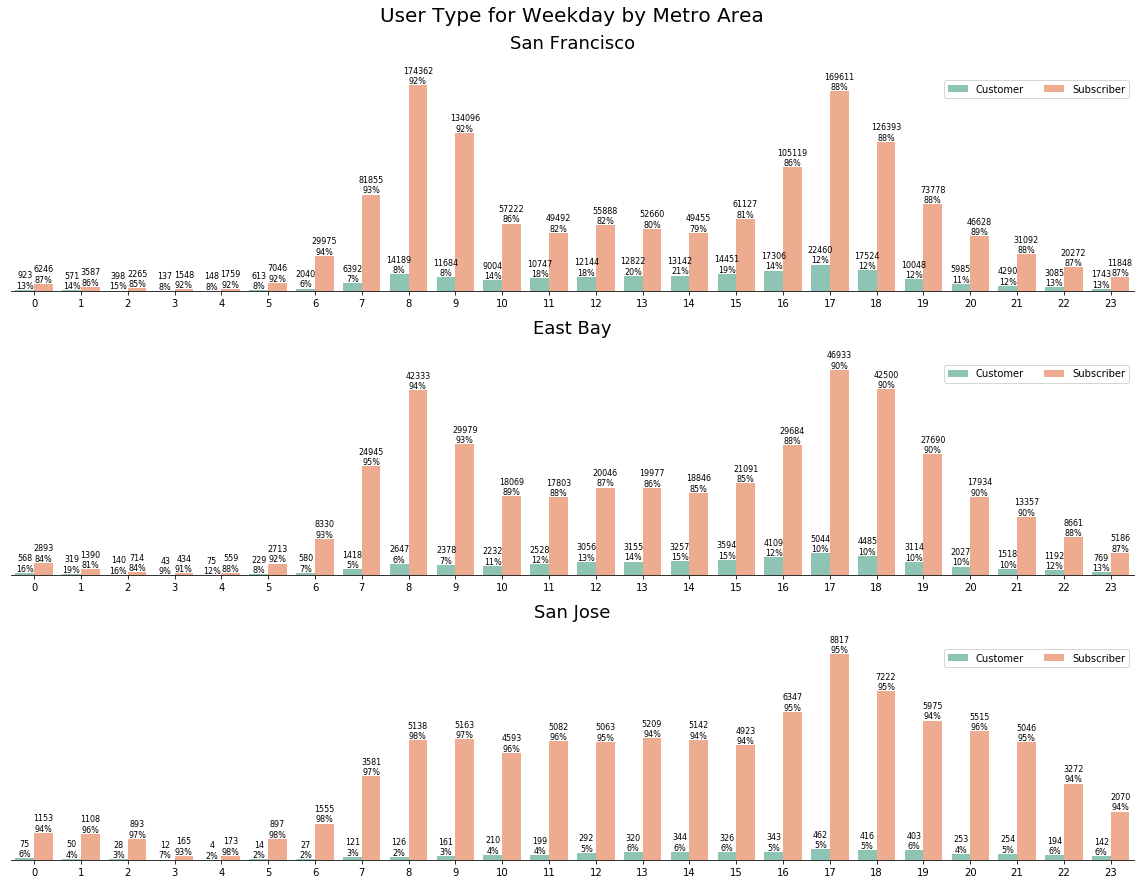

In [81]:
# Since there's only three subplots to create, using the full data should be fine.
fig = plt.figure(figsize = [16, 12])

# Subplot 1: San Francisco, ride count for hour by user_type
##############################################################
ax1 = plt.subplot(3, 1, 1)
ax1.set_title("San Francisco\n", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "San Francisco"'), 
              x = 'hour', hue = 'user_type', palette = 'Set2', alpha=0.8) # data start 201806 to 201905
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax1.legend(ncol = 2)

# Percentage for each hour
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each hour
type_sum = df_clean.query('start_metro_area == "San Francisco"').groupby('hour')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "San Francisco"')['hour'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax1.patches:
    ax1.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=8)
    i+=1

# Subplot 2: East Bay, ride count for hour by user_type
##############################################################
ax2 = plt.subplot(3, 1, 2)
ax2.set_title("East Bay\n", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "East Bay"'), 
              x = 'hour', hue = 'user_type', palette = 'Set2', alpha=0.8)
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax2.legend(ncol = 2)

# Percentage for each hour
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each hour
type_sum = df_clean.query('start_metro_area == "East Bay"').groupby('hour')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "East Bay"')['hour'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax2.patches:
    ax2.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=8)
    i+=1

# Subplot 3: East Bay, ride count for hour by user_type
##############################################################
ax3 = plt.subplot(3, 1, 3)
ax3.set_title("San Jose\n", size=18)
sns.countplot(data = df_clean.query('start_metro_area == "San Jose"'), 
              x = 'hour', hue = 'user_type', palette = 'Set2', alpha=0.8)
plt.xlabel('')
plt.ylabel('')
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
ax3.legend(ncol = 2)
# Percentage for each hour
perc_list_customer, perc_list_subscriber, perc_list = [], [], []

# Calculate % for 2 user types for each hour
type_sum = df_clean.query('start_metro_area == "San Jose"').groupby('hour')['user_type'].value_counts().sort_index().to_list()
total_sum = df_clean.query('start_metro_area == "San Jose"')['hour'].value_counts().sort_index().to_list()

# Arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# Add annotations
i=0
for p in ax3.patches:
    ax3.annotate('{:.0f}\n{:.0f}%'.format(p.get_height(), perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=8)
    i+=1

# Aesthetic Wrangling
fig.suptitle('User Type for Weekday by Metro Area', size=20, y=1.02)
sns.despine(fig, left = True)
plt.tight_layout();

> From graph above, **San Jose**'s hourly distribution **does not exhibits the "2 peaks" pattern** as San Francisco and East Bay. Usages from **8am to 3pm** is rather **flat**. I think the reason behind is the flexible working hours for companies in the San Jose area, people don't have to follow the 9am-to-5pm work schedule.

## **`user_type`** for **`hour`** and **`weekday`**

> **Subscriber**'s most frequently used time is **weekday around 7-9am and 4-6pm**, which are the commute times. **Customer**'s most frequently used time, beside the commute times, is **weekend 12pm-4pm**. <br>
> **Subscribers** use the bike mostly for commute to work. **Customers** use the bike during weekend for leisure.

In [82]:
# Prepare df for subscriber
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(['hour','weekday']).agg({'bike_id' : 'count'})
df_subscriber = df_subscriber.pivot_table(index='hour', columns='weekday', values='bike_id')
# Prepare df for customer
df_customer = df_clean.query('user_type == "Customer"').groupby(['hour','weekday']).agg({'bike_id' : 'count'})
df_customer = df_customer.pivot_table(index='hour', columns='weekday', values='bike_id')

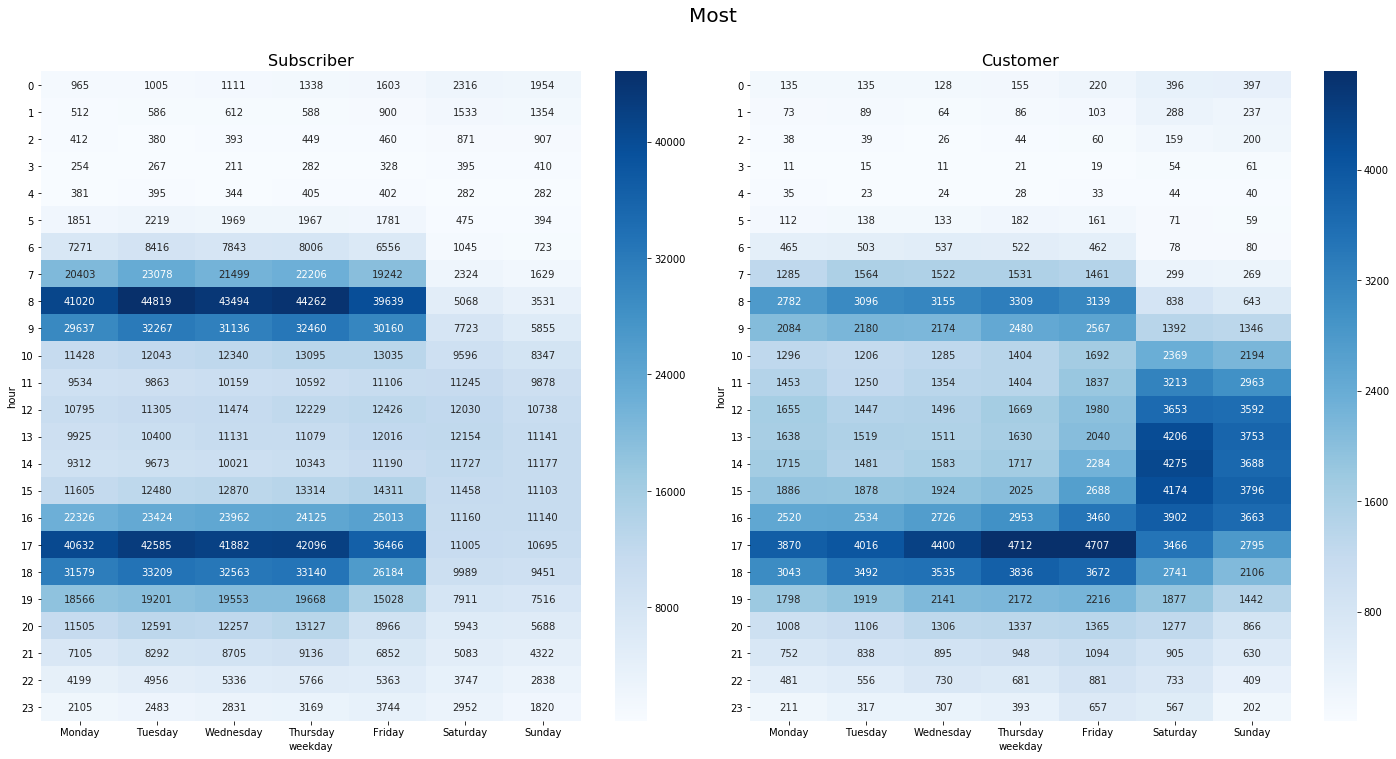

In [83]:
plt.subplots(figsize=(20,10))

# df_subscriber
fig1 = plt.subplot(1,2,1)
ax1 = sns.heatmap(df_subscriber, annot=True, fmt='d', cmap='Blues')
# Aesthetic Wrangling
plt.title('Subscriber',size=16)
plt.yticks(rotation=360)

# df_customer
fig2 = plt.subplot(1,2,2)
ax2 = sns.heatmap(df_customer, annot=True, fmt='d', cmap='Blues')
# Aesthetic Wrangling
plt.title('Customer',size=16)
plt.yticks(rotation=360)

plt.suptitle("Most ", size=20, y=1.05)
plt.tight_layout();

> From graph above, **Subscriber**'s most frequently used time is **weekday around 7-9am and 4-6pm**, which are the commute times. **Customer**'s most frequently used time, beside the commute times, is **weekend 12pm-4pm**. <br>
> I think **Subscribers** use the bike mostly for commute to work. **Customers** use the bike during weekend for leisure.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

### Were there any interesting or surprising interactions between features?

#### 3.1 Numerical Variables vs. Categorical Variables hue by User Types
> From **`duration`**, **`member_age`** vs.  **`user_gender`**, **`metro_area`** by **`user_type`** graph:
01. **Subscribers** have **shorter and more concentrated duration** than **Customers**
02. **San Jose's Subscriber** population is the **youngest**
03. **East Bay's Subscriber** have the **shortest duration range**

#### 3.2 **`user_type`** for **`age_group`** by **`metro_area`**
> Majority of users is from **age groups 20s and 30s**. Although San Francisco metro area has most rides but the two largest user populations 20s and 30s age groups have the **lowest subscription ratio**.

#### 3.3 **`user_type`** for **`month`** by **`metro_area`**
> **San Jose**, as the last area of GoBike started operation, has the **lowest total number of rides for each month**. However, it has the **highest user's subscription ratios for each month**.

#### 3.4 **`user_type`** for **`weekday`** by **`metro_area`**
> **Subscribers** ride on **weekday more often than on weekend**. **Customers** ride on **weekend more often than on weekday**. This indicate most subscribers use the bike as commute and most of the customers use the bike for leisure.

#### 3.5 **`user_type`** for **`hour`** by **`metro_area`**
> **San Jose**'s hourly distribution **does not exhibits the "2 peaks" pattern** as San Francisco and East Bay. Usages from **8am to 3pm** is rather **flat**. I think the reason behind is the flexible working hours for companies in the San Jose area, people don't have to follow the 9am-to-5pm work schedule.

#### 3.6 **`user_type`** for **`hour`** and **`weekday`**
> **Subscriber**'s most frequently used time is **weekday around 7-9am and 4-6pm**, which are the commute times. **Customer**'s most frequently used time, beside the commute times, is **weekend 12pm-4pm**. <br>
> I think **Subscribers** use the bike mostly for commute to work. **Customers** use the bike during weekend for leisure.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!